![](https://image.shutterstock.com/image-photo/angry-people-screaming-260nw-292800785.jpg)

[Reference](http://neuralnetworksanddeeplearning.com/)

- Neural networks, a beautiful biologically-inspired programming paradigm which enables a computer to learn from observational data
- Deep learning, a powerful set of techniques for learning in neural networks 

### An example:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3I7goOlpVqv9_FZ_k6w4V0c56SCziU8klbsBBgh2TTL7eg3u9)

### Let's take a very closer look and brain:

![](https://d3i71xaburhd42.cloudfront.net/4807bf70ab59417a295d92c54954832577812bfe/4-Figure1-1.png)

### Perceptrons

\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}

### Now we can make a neural network:

![](http://neuralnetworksanddeeplearning.com/images/tikz1.png)

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}

In [41]:
%matplotlib inline
import numpy as np
import pylab as plt

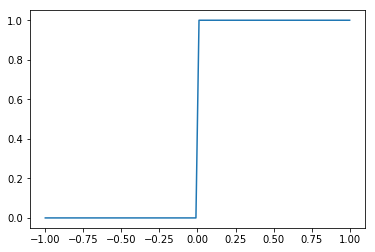

In [42]:
z = np.linspace(-1,1,100)
plt.plot(z,np.heaviside(z,0))

### Activation function needs to be differentiable!

![](http://neuralnetworksanddeeplearning.com/images/tikz8.png)

$$\mathcal{A}(w \cdot x+b)$$

\begin{eqnarray} 
  \frac{1}{1+\exp(-\sum_j w_j x_j-b)}.
\tag{4}\end{eqnarray}

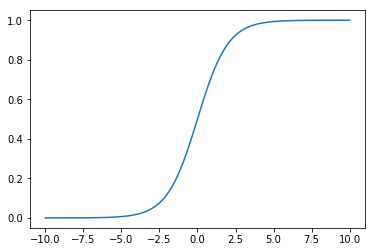

In [43]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-10,10,100)
plt.plot(z,sigmoid(z))

### Multilayer perceptrons or MLPs

![](http://neuralnetworksanddeeplearning.com/images/tikz11.png)

### The arrows show the NN is feedforward.

### Going back to the numbers problem ([MNIST](http://yann.lecun.com/exdb/mnist/))

In [58]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


1


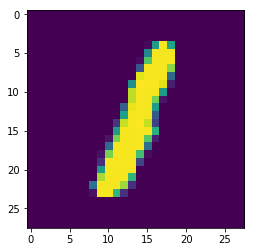

In [60]:
ii = np.random.randint(x_train.shape[0])

plt.imshow(x_train[ii])
print(y_train[ii])

![](http://neuralnetworksanddeeplearning.com/images/tikz12.png)

In [61]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [62]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [63]:
x_train = x_train.reshape(-1,28*28)
y_train = np.array([vectorized_result(y) for y in y_train]).reshape(-1,10)
x_test = x_test.reshape(-1,28*28)
y_test = np.array([vectorized_result(y) for y in y_test]).reshape(-1,10)

In [64]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(30, activation='relu', input_dim=28*28))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 1s 13us/step - loss: 3.7743 - accuracy: 0.1832
Epoch 2/20
60000/60000 [==============================] - 1s 12us/step - loss: 2.0739 - accuracy: 0.2028
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.9838 - accuracy: 0.2420
Epoch 4/20
60000/60000 [==============================] - 1s 13us/step - loss: 1.8870 - accuracy: 0.2756
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.8629 - accuracy: 0.2797
Epoch 6/20
60000/60000 [==============================] - 1s 13us/step - loss: 1.8261 - accuracy: 0.2842
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 1.8118 - accuracy: 0.2886
Epoch 8/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.9157 - accuracy: 0.2519
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 2.0178 - accuracy: 0.2118
Epoch 10/20
60000/60000 [==============================

In [68]:
score = model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 0s 9us/step


In [69]:
score

[1.8213214612960815, 0.2782999873161316]

In [76]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation
from keras.optimizers import SGD

x_in = Input(shape=(28*28,),name='input_layer')
x1 = Dense(30,
           activation='relu',
           input_dim=28*28,
           name='layer-1')(x_in)

x2 = Dense(10,
           activation='softmax',
           name='layer-2')(x1)

model = Model(inputs=[x_in],outputs=[x2])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 784)               0         
_________________________________________________________________
layer-1 (Dense)              (None, 30)                23550     
_________________________________________________________________
layer-2 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [77]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [78]:
history = model.fit(x_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 3.7316 - accuracy: 0.1867
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 2.0584 - accuracy: 0.2226
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 2.0196 - accuracy: 0.2345
Epoch 4/20
60000/60000 [==============================] - 1s 13us/step - loss: 1.9786 - accuracy: 0.2463
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.9436 - accuracy: 0.2570
Epoch 6/20
60000/60000 [==============================] - 1s 13us/step - loss: 1.9278 - accuracy: 0.2622
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.9486 - accuracy: 0.2578
Epoch 8/20
60000/60000 [==============================] - 1s 14us/step - loss: 1.9229 - accuracy: 0.2617
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.9182 - accuracy: 0.2633
Epoch 10/20
60000/60000 [==============================

In [83]:
model.layers[1].weights

[<tf.Variable 'layer-1_2/kernel:0' shape=(784, 30) dtype=float32, numpy=
 array([[-0.0541045 , -0.03272625,  0.07537361, ...,  0.03840913,
          0.07351724,  0.02489997],
        [-0.01743929,  0.02480133, -0.03109419, ..., -0.02269403,
         -0.07807899, -0.03554087],
        [ 0.03046632, -0.08105048, -0.05276664, ...,  0.0129194 ,
          0.03348399, -0.00972317],
        ...,
        [-0.04795606,  0.03138547, -0.06077447, ...,  0.02830656,
         -0.03357159,  0.06342835],
        [ 0.03630394,  0.00091434,  0.0128255 , ..., -0.08245108,
         -0.00340126,  0.07042164],
        [ 0.06489775, -0.05820342, -0.00295708, ...,  0.04991683,
          0.03642176,  0.00786474]], dtype=float32)>,
 <tf.Variable 'layer-1_2/bias:0' shape=(30,) dtype=float32, numpy=
 array([-0.00059162, -0.00031174, -0.0003843 , -0.00026466, -0.00022694,
        -0.00040816, -0.00027154, -0.0003972 , -0.00074417, -0.00054189,
        -0.00239426, -0.0007254 , -0.00097115, -0.00026469, -0.00278513

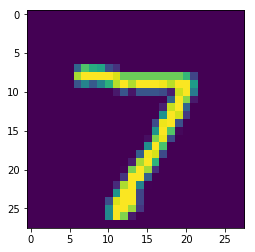

In [85]:
plt.imshow(x_test[0].reshape(28,28))

In [88]:
x_test[0:1].shape

(1, 784)

In [90]:
np.argmax(model.predict(x_test[0:1]))

7

# AND WE NEED A GOOD COMPUTER!

![](https://miro.medium.com/max/776/1*Eb4YFMdn8LJhxjJCuykiLg.png)

In [91]:
from keras.datasets import boston_housing

In [92]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

### Dataset Description
- Boston housing dataset has total 506 data instances (404 training & 102 test)
- 13 attributes (features) to predict "the median values of the houses at a location"
- Doc: https://keras.io/datasets/

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [94]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [99]:
model = Sequential()
model.add(Dense(10, input_shape = (13,)))    
model.add(Activation('tanh'))
model.add(Dense(10))                        
model.add(Activation('tanh'))
model.add(Dense(10))                       
model.add(Activation('tanh'))
model.add(Dense(1))  

model.compile(optimizer = 'sgd', loss = 'mse')

In [96]:
# This is equivalent to the above code block
model = Sequential()
model.add(Dense(10, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

In [100]:
from keras import optimizers

In [101]:
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

In [102]:
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed

### Summary of the model

In [103]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                140       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                

### 2. Training
- Training the model with training data provided

In [104]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
404/404 [==============================] - 0s 193us/step - loss: 280.5018 - mse: 280.5018
Epoch 2/100
404/404 [==============================] - 0s 48us/step - loss: 88.6452 - mse: 88.6452
Epoch 3/100
404/404 [==============================] - 0s 46us/step - loss: 82.3068 - mse: 82.3068
Epoch 4/100
404/404 [==============================] - 0s 31us/step - loss: 77.5539 - mse: 77.5539
Epoch 5/100
404/404 [==============================] - 0s 37us/step - loss: 77.3340 - mse: 77.3340
Epoch 6/100
404/404 [==============================] - 0s 41us/step - loss: 76.1818 - mse: 76.1818
Epoch 7/100
404/404 [==============================] - 0s 41us/step - loss: 84.9779 - mse: 84.9779
Epoch 8/100
404/404 [==============================] - 0s 36us/step - loss: 86.1767 - mse: 86.1767
Epoch 9/100
404/404 [==============================] - 0s 28us/step - loss: 86.0187 - mse: 86.0187
Epoch 10/100
404/404 [==============================] - 0s 54us/step - loss: 85.6429 - mse: 85.6429
Epoch 

Epoch 83/100
404/404 [==============================] - 0s 28us/step - loss: 84.9674 - mse: 84.9674
Epoch 84/100
404/404 [==============================] - 0s 26us/step - loss: 85.0261 - mse: 85.0261
Epoch 85/100
404/404 [==============================] - 0s 32us/step - loss: 84.8147 - mse: 84.8147
Epoch 86/100
404/404 [==============================] - 0s 31us/step - loss: 85.0486 - mse: 85.0486
Epoch 87/100
404/404 [==============================] - 0s 36us/step - loss: 85.3336 - mse: 85.3336
Epoch 88/100
404/404 [==============================] - 0s 36us/step - loss: 85.2314 - mse: 85.2314
Epoch 89/100
404/404 [==============================] - 0s 32us/step - loss: 85.0297 - mse: 85.0297
Epoch 90/100
404/404 [==============================] - 0s 44us/step - loss: 85.1038 - mse: 85.1038
Epoch 91/100
404/404 [==============================] - 0s 27us/step - loss: 84.6853 - mse: 84.6853
Epoch 92/100
404/404 [==============================] - 0s 22us/step - loss: 85.0146 - mse: 85.0146


### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [105]:
results = model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 284us/step


In [106]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'mse']
[83.30722404928768, 83.3072280883789]


In [107]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  83.30722404928768
mse:  83.3072280883789


## MLP for classification tasks
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [10]:
whole_data = load_breast_cancer()

In [11]:
X_data = whole_data.data
y_data = whole_data.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7) 

### Dataset Description
- Breast cancer dataset has total 569 data instances (212 malign, 357 benign instances)
- 30 attributes (features) to predict the binary class (M/B)
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### 1. Creating a model
- Same with regression model at the outset

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


### 1-1. Adding layers
- Keras layers can be **added** to the model
- Adding layers are like stacking lego blocks one by one
- It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added
- Doc: https://keras.io/layers/core/

In [72]:
# Keras model with two hidden layer with 10 neurons each 
model = Sequential()
model.add(Dense(10, input_shape = (30,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem
model.add(Activation('sigmoid'))

In [4]:
# This is equivalent to the above code block
model = Sequential()
model.add(Dense(10, input_shape = (30,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

### 1-2. Model compile
- Keras model should be "compiled" prior to training
- Types of loss (function) and optimizer should be designated
    - Doc (optimizers): https://keras.io/optimizers/
    - Doc (losses): https://keras.io/losses/

In [5]:
from keras import optimizers

In [6]:
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

In [7]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

### Summary of the model

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


### 2. Training
- Training the model with training data provided

In [37]:
model.fit(X_train, y_train, batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
404/404 [==============================] - 0s 69us/step - loss: 77.0093 - mse: 77.0093
Epoch 2/10
404/404 [==============================] - 0s 66us/step - loss: 77.0731 - mse: 77.0731
Epoch 3/10
404/404 [==============================] - 0s 33us/step - loss: 77.2765 - mse: 77.2765
Epoch 4/10
404/404 [==============================] - 0s 21us/step - loss: 79.0802 - mse: 79.0802
Epoch 5/10
404/404 [==============================] - 0s 14us/step - loss: 77.5045 - mse: 77.5045
Epoch 6/10
404/404 [==============================] - 0s 14us/step - loss: 77.0580 - mse: 77.0580
Epoch 7/10
404/404 [==============================] - 0s 15us/step - loss: 78.2971 - mse: 78.2971
Epoch 8/10
404/404 [==============================] - 0s 28us/step - loss: 77.4874 - mse: 77.4874
Epoch 9/10
404/404 [==============================] - 0s 18us/step - loss: 79.7340 - mse: 79.7340
Epoch 10/10
404/404 [==============================] - 0s 24us/step - loss: 77.0675 - mse: 77.0675


### 3. Evaluation
- Keras model can be evaluated with evaluate() function
- Evaluation results are contained in a list
    - Doc (metrics): https://keras.io/metrics/

In [38]:
results = model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 160us/step


In [39]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'mse']
[77.59952141256893, 77.59952545166016]


In [40]:
print('loss: ', results[0])
print('accuracy: ', results[1])

loss:  77.59952141256893
accuracy:  77.59952545166016


# Famous Loss Functions

## Squared Error Loss
![](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/mse.jpg.jpg?resize=289%2C96&ssl=1)

## Absolute Error Loss
![](https://i2.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/mae.jpg.jpg?resize=277%2C94&ssl=1)

## Huber Loss
![](https://i2.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/huber.jpg.jpg?resize=513%2C202&ssl=1)

## Binary Cross Entropy Loss
![](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/06/entropy.jpg1.jpg?resize=418%2C132&ssl=1)

## Multi-Class Cross Entropy Loss
![](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/06/mce.jpg1.jpg?resize=679%2C210&ssl=1)

## KL-Divergence
![](https://i1.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/06/kl.jpg1.jpg?resize=624%2C280&ssl=1)

[Reference](https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/)